<a href="https://colab.research.google.com/github/Bhuvana1797/Personal-Portofolios/blob/main/Financial_Report_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Mount to the 'MyDrive' directory

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import plotly.graph_objects as go

# Sample quarterly financial data
data = {
    'Metric': ['Revenue', 'COGS', 'Gross Profit', 'Operating Expenses', 'Net Income', 'Operating Cash Flow', 'Investing Cash Flow', 'Financing Cash Flow', 'Net Change in Cash', 'Gross Profit Margin'],
    'Value': [10, 6, 10-6, 2, 1.5, 10*0.3, -2, 0, 10, (10-6)/10]
}

In [ ]:
# Create DataFrame
df = pd.DataFrame(data)

# Constants for financial projections
revenue_last_quarter = 10
growth_rate = 0.15 # 15% quarterly increase
quarters = 4

# Scenario Analysis
scenarios = {
    'Optimistic': growth_rate + 0.05,
    'Base Case': growth_rate,
    'Pessimistic': growth_rate - 0.05
}


In [ ]:
# Monte Carlo Simulation
np.random.seed(42)
num_simulations = 1000
simulated_revenues = []

for _ in range(num_simulations):
    simulated_growth = np.random.normal(loc=growth_rate, scale=0.02) # Normal distribution with some variance
    simulated_revenue = revenue_last_quarter * ((1 + simulated_growth) ** quarters)
    simulated_revenues.append(simulated_revenue)

# Scenario Forecast
forecast_results = {}
for scenario, rate in scenarios.items():
    projected_revenue = revenue_last_quarter * ((1 + rate) ** quarters)
    forecast_results[scenario] = {
        'Revenue': projected_revenue,
        'COGS': projected_revenue * 0.60,
        'Gross Profit': projected_revenue - (projected_revenue * 0.60),
        'Operating Expenses': projected_revenue * 0.20,
        'Net Income': (projected_revenue - (projected_revenue * 0.60)) - (projected_revenue * 0.20),
        'Operating Cash Flow': projected_revenue * 0.30,
        'Investing Cash Flow': -2,
        'Financing Cash Flow': 0,
        'Net Change in Cash': projected_revenue * 0.30 - 2,
        'Gross Profit Margin': (projected_revenue - (projected_revenue * 0.60)) / projected_revenue
    }


In [ ]:
# Create DataFrame for forecast results
forecast_df = pd.DataFrame(forecast_results).T

# Update DataFrame with base case forecast values
df['Value'] = [
    forecast_results['Base Case']['Revenue'],
    forecast_results['Base Case']['COGS'],
    forecast_results['Base Case']['Gross Profit'],
    forecast_results['Base Case']['Operating Expenses'],
    forecast_results['Base Case']['Net Income'],
    forecast_results['Base Case']['Operating Cash Flow'],
    forecast_results['Base Case']['Investing Cash Flow'],
    forecast_results['Base Case']['Financing Cash Flow'],
    forecast_results['Base Case']['Net Change in Cash'],
    forecast_results['Base Case']['Gross Profit Margin']
]

<ipython-input-6-ddf48d92dc30>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=forecast_df.columns, y=forecast_df.loc['Base Case'], palette='viridis')


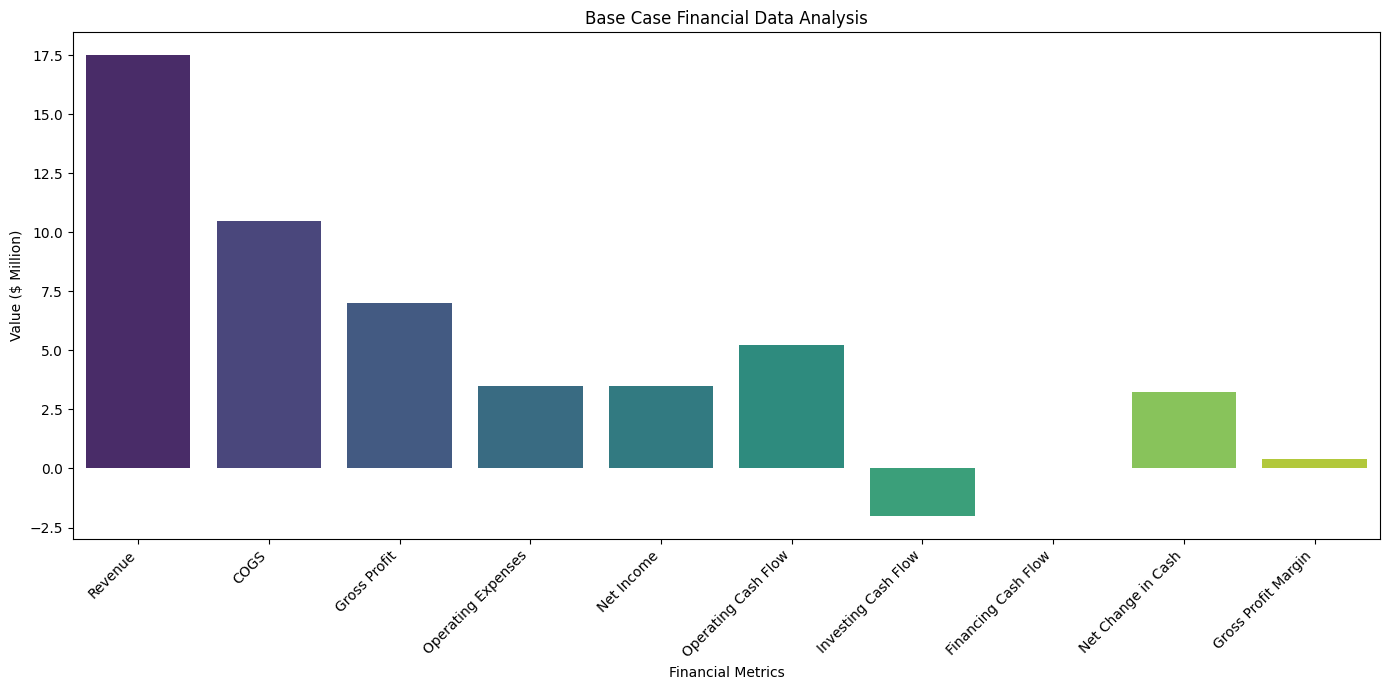

In [ ]:
# Visualization: Scenario Analysis
plt.figure(figsize=(14, 7))
sns.barplot(x=forecast_df.columns, y=forecast_df.loc['Base Case'], palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Base Case Financial Data Analysis')
plt.xlabel('Financial Metrics')
plt.ylabel('Value ($ Million)')
plt.tight_layout()
plt.show()


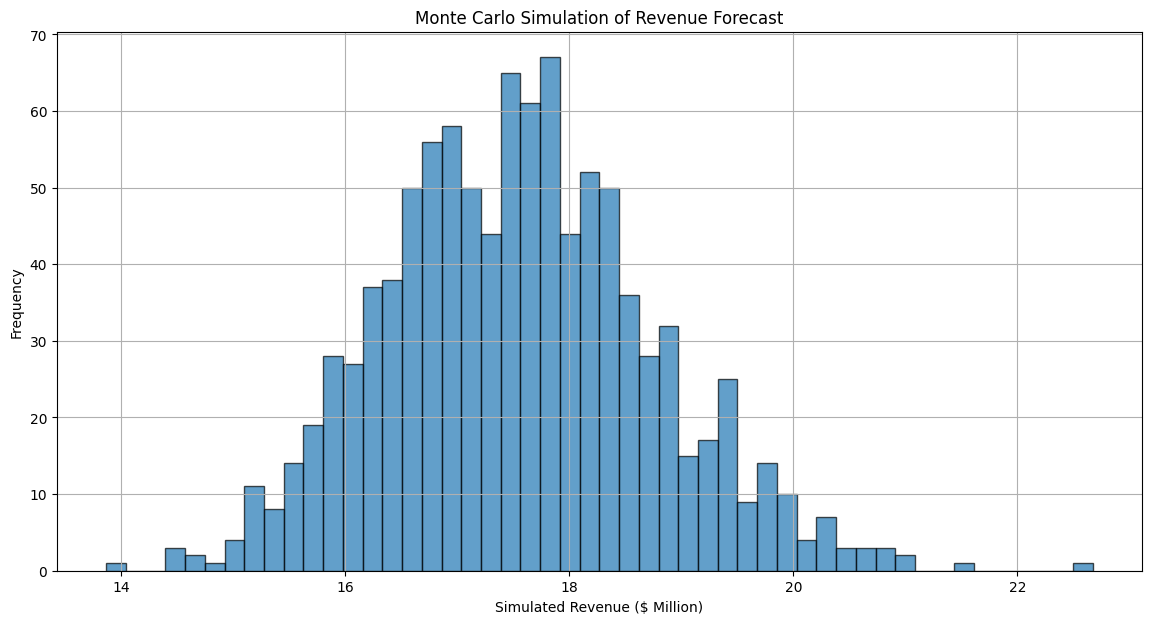

In [ ]:
# Monte Carlo Simulation Visualization
plt.figure(figsize=(14, 7))
plt.hist(simulated_revenues, bins=50, edgecolor='k', alpha=0.7)
plt.title('Monte Carlo Simulation of Revenue Forecast')
plt.xlabel('Simulated Revenue ($ Million)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



In [ ]:
# Interactive Dashboard: Forecast Results
fig = go.Figure()

for scenario, values in forecast_results.items():
    fig.add_trace(go.Bar(x=list(values.keys()), y=list(values.values()), name=scenario))

fig.update_layout(barmode='group', title='Scenario Analysis: Financial Data Forecast',
                  xaxis_title='Financial Metrics', yaxis_title='Value ($ Million)', template='plotly_dark')

fig.show()

# Print forecast results
print("Forecast Results:")
print(forecast_df)

Forecast Results:
               Revenue       COGS  Gross Profit  Operating Expenses  \
Optimistic   20.736000  12.441600      8.294400            4.147200   
Base Case    17.490062  10.494037      6.996025            3.498012   
Pessimistic  14.641000   8.784600      5.856400            2.928200   

             Net Income  Operating Cash Flow  Investing Cash Flow  \
Optimistic     4.147200             6.220800                 -2.0   
Base Case      3.498012             5.247019                 -2.0   
Pessimistic    2.928200             4.392300                 -2.0   

             Financing Cash Flow  Net Change in Cash  Gross Profit Margin  
Optimistic                   0.0            4.220800                  0.4  
Base Case                    0.0            3.247019                  0.4  
Pessimistic                  0.0            2.392300                  0.4  
